In [1]:
!pip install opencv-python
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [2]:
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import pytesseract as tess

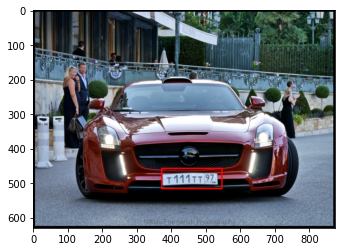

In [14]:
carplate_img = cv2.imread('test_sample3.jpg')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)
plt.imshow(carplate_img_rgb)

In [15]:
carplate_haar_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [16]:
def carplate_detect(image):
    carplate_overlay = image.copy() 
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=3)
    for x,y,w,h in carplate_rects: 
      cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
      return carplate_overlay

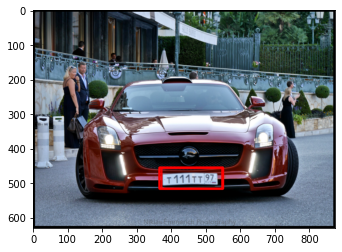

In [17]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
plt.imshow(detected_carplate_img)

In [18]:
def carplate_extract(image):
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5)
    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] # Adjusted to extract specific region of interest i.e. car license plate
        
        return carplate_img

In [19]:
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

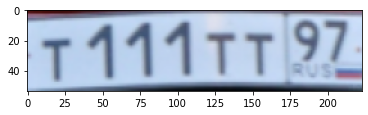

In [20]:
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
# print(carplate_extract_img)
plt.imshow(carplate_extract_img)

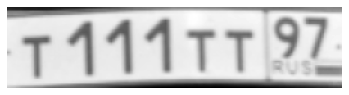

In [21]:
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray')

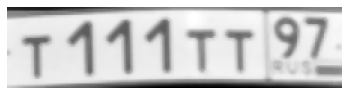

In [22]:
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # kernel size 3
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray')

In [23]:
print(tess.image_to_string(carplate_extract_img_gray_blur, config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

T1117 97

